In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import mean squared error
from sklearn.metrics import mean_squared_error


In [135]:
#load data/dynamic_input_mean.npy file
dynamic_input_mean = np.load('../data/dynamic_input_mean.npy')
dynamic_input_std = np.load('../data/dynamic_input_std.npy')
print (dynamic_input_mean)
print (dynamic_input_std)

[0.1197112  1.73881751 0.11084138 1.7988615  0.1094989  1.81207202
 0.10324037 1.71015936]
[1.6551339  5.82894155 1.54915965 6.13199342 1.51485388 6.19980411
 1.47532519 5.83794635]


In [109]:
# load .npy files from the work_dir/bnrelu/ folder
trues = np.load('../work_dirs/7days_6chvol_hid/saved/trues.npy')
preds = np.load('../work_dirs/7days_6chvol_unet/saved/preds.npy')
preds1 = np.load('../work_dirs/7days_6chvol_hid/saved/preds.npy')
#preds2 = np.load('../work_dirs/7days_ch6vol_simunet/saved/preds.npy')
preds2 = np.load('../work_dirs/7days_6chvol_bnrelu/saved/preds.npy')

In [105]:
# speed
trues = np.load('../work_dirs/7days_6chspeed_hid/saved/trues.npy')
preds = np.load('../work_dirs/7days_6chspeed_unet/saved/preds.npy')
preds1 = np.load('../work_dirs/7days_6chspeed_hid/saved/preds.npy')
#preds2 = np.load('../work_dirs/7days_ch6vol_simunet/saved/preds.npy')
preds2 = np.load('../work_dirs/7days_6chspeed_bnrelu/saved/preds.npy')

In [142]:
# load .npy files from the work_dir/bnrelu/ folder
#trues = np.load('../work_dirs/7days_comb_bnrelu/saved/trues.npy')
preds = np.load('../work_dirs/7days_comb_bnrelu/saved/preds.npy')
#preds1 = np.load('../work_dirs/7days_comb_predrnn/saved/preds.npy')
#preds2 = np.load('../work_dirs/7days_ch6vol_simunet/saved/preds.npy')

In [4]:
trues = trues[:,:,1::2,:,:]
preds = preds[:,:,1::2,:,:]
preds1 = preds1[:,:,1::2,:,:]

In [7]:
# get pixel wise mse 
mse = np.mean((trues - preds)**2, axis=0)
# Get total mse averaged over all pixels
total_mse = np.mean(mse)
print (total_mse)


ValueError: operands could not be broadcast together with shapes (240,6,2,128,128) (240,6,4,128,128) 

In [17]:
std_trues = np.std(trues, axis=1)
std_preds1 = np.std(preds1, axis=1)
std_preds2 = np.std(preds2, axis=1)
std_preds = np.std(preds, axis=1)

In [18]:
#print mean of stds 
print (np.mean(std_trues))
print (np.mean(std_preds1))
print (np.mean(std_preds2))
print (np.mean(std_preds))

2.178046
0.054546434
0.15141533
0.047711853


In [110]:
# mean swuare error netween 52,52. iMPORT APPROPRIATE packages
print (mean_squared_error(trues.flatten(), preds.flatten()))
print (mean_squared_error(trues.flatten(), preds1.flatten()))
print (mean_squared_error(trues.flatten(), preds2.flatten()))

0.71221536
0.7758209
0.8609247


In [111]:
px = 53
py = 51
print (mean_squared_error(trues[:,2,1,px,py].flatten(), preds[:,2,1,px,py].flatten()))
print (mean_squared_error(trues[:,2,1,px,py].flatten(), preds1[:,2,1,px,py].flatten()))
print (mean_squared_error(trues[:,2,1,px,py].flatten(), preds2[:,2,1,px,py].flatten()))


3.8838065
3.7996345
4.3110447


In [7]:
%matplotlib qt5

In [121]:
px = 53
py = 51
plt.plot(trues[:,0,1,px, py], label='timeseries')
plt.plot(preds[:,0,1,px, py], label='unet')
plt.plot(preds1[:,0,1,px, py], label='hid')
plt.plot(preds2[:,0,1,px, py], label='bnrelu')
plt.legend()

In [21]:
# calculate mean of std of :,:,1,52,52
std1 = np.std(trues[:,:,1,52,52], axis=1)
std2 = np.std(preds[:,:,1,52,52], axis=1)
std3 = np.std(preds1[:,:,1,52,52], axis=1)
std4 = np.std(preds2[:,:,1,52,52], axis=1)

print (np.mean(std1))
print (np.mean(std2))
print (np.mean(std3))
print (np.mean(std4))

23.583155
1.1012225
1.2929058
2.2629595


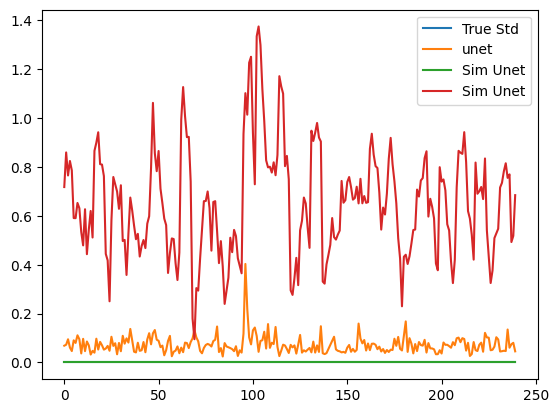

In [135]:
#plt.plot(trues[:,0,0,52,52], label='timeseries')
#plt.plot(preds1[:,0,0,52,52], label='preds')
plt.plot(std_trues[:,0,52,52], label='True Std')
plt.plot(std_preds[:,0,52,52], label='unet')
plt.plot(std_preds1[:,0,52,52], label='Sim Unet')
plt.plot(std_preds2[:,0,52,52], label='Sim Unet')
plt.legend()

In [122]:
# plot distribution of trues, preds and preds1
px, py = 53, 51
plt.hist(trues[:,0,1,px,py].flatten(), alpha=0.5, label='trues')
plt.hist(preds[:,0,1,px,py].flatten(), alpha=0.5, label='unet')
bin_r = list(range(40))
plt.hist(preds1[:,0,1,px,py].flatten(), alpha=0.5, label='hid')
plt.hist(preds2[:,0,1,px,py].flatten(), alpha=0.5, label='bnrelu')

(array([ 30.,  27., 111.,  61.,   6.,   2.,   0.,   2.,   0.,   1.]),
 array([0.03044832, 0.72727793, 1.42410755, 2.12093711, 2.8177669 ,
        3.51459646, 4.21142626, 4.90825558, 5.60508537, 6.30191469,
        6.99874449]),
 <BarContainer object of 10 artists>)

In [90]:
# convert preds to int
preds = np.round(preds)

In [76]:
preds.shape

(240, 6, 4, 128, 128)

In [119]:
data = preds2[100,:,1,:,:] 
# the first dimension is the time dimension

from matplotlib.animation import FuncAnimation


# Create a figure and axis
fig, ax = plt.subplots()

# increase size of plot 
fig.set_size_inches(10, 10)
# Create an empty plot with initial data
#img = ax.imshow(data[0], cmap='viridis', animated=True, vmin=0, vmax=20)
img = ax.imshow(data[0], cmap='hot', animated=True)

# Function to update the plot for each frame
def update(frame):
    img.set_array(data[frame])  # Update the image data for the current frame
    return img,

# Create the animation
animation = FuncAnimation(fig, update, frames=range(6), interval=200, blit=True)

# Display the animation
from IPython.display import HTML
HTML(animation.to_jshtml())

In [129]:
# save animation as a gif
animation.save('incep.gif', writer='imagemagick')

In [123]:
mse = np.mean((trues - preds)**2, axis=0)
mse1 = np.mean((trues - preds2)**2, axis=0)

In [61]:
mse1[0,1,52,52]

892.9958

In [124]:
# sum over first axis in preds1 and trues1 and divide by 240
preds1 = np.sum(preds2, axis=0)
#trues = np.sum(trues, axis=0)
preds1 = preds1 / 240
#trues = trues / 240

In [31]:
preds1.shape

(1, 1, 128, 128)

In [34]:
mse1.shape

(1, 1, 128, 128)

In [48]:
%matplotlib qt5

In [60]:
mse1[52,52]

904.0

In [125]:
# take mean of mse and mse1 over first axis 
mse = np.mean(mse, axis=0)
mse1 = np.mean(mse1, axis=0)
print (mse1[1,52,52])

15.670799


In [126]:
# round values to nearest integer in mse1
mse1 = np.round(mse1[1])


In [127]:
mse  = np.round(mse[1])

In [58]:
mse[52,52]

478.0

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random binary image (128x128)
image = preds2[0,0,1]

# Calculate the figure size based on the image size
fig_width = max(16, image.shape[1] * 0.5)
fig_height = max(12, image.shape[0] * 0.5)

# Create a figure with adjusted size
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

color = np.where(mse > mse1, 'red', np.where(mse < mse1, 'blue', 'green'))
# Display the image with labeled pixels
im = ax.imshow(image, cmap='gray')
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if mse1[i, j] > 0 or mse[i, j] > 0:
            ax.text(j, i, str(int(image[i,j]))+','+str(mse[i, j])+","+str(mse1[i,j]),
                    ha='center', va='center', color=color[i,j], fontsize=10)

# Add colorbar
cbar = fig.colorbar(im)

# Set labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Pixel Value Visualization')

# Show the plot
plt.show()


In [68]:
mse.shape

(128, 128)

In [70]:
str(mse[i, j])+","+str(mse1[i,j])

'13.0,3.0'